In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Load the dataset
df = pd.read_csv('/home/sam/code/cohere-reasoning-v2/datasets/cn_k12_math_problems_weak_solutions_completion_250.csv')
print(list(df.columns))
df.head()

# source: Subset of the NuminaMath dataset
# problem: ground-truth problem statement
# solution: ground-truth solutoin
# messages: ignore this, it's from Numina but its' just the problem and solutoin packaged into a conversation
# train: Whether it came from the train/test split of Numina; we don't really care about this.
# bad_solution: An incorrect solution generated by a weak completer.
# bad solutoin_verification_trace: The reasoning for why the strong completer thought the weak-completer's solution was incorrect.
# bad_solution_verification_prefix: The prefix of the strong completer's verification response, up to and including the incorrect reasoning.
# strong solution: The strong completer's attempt to solve for the solution, without the wrench of the bad solution's prefix.
# completion: The strong completer's completion of the bad solution's prefix.
# completion_verified: Whether the strong completer's completion was verified to be correct by the strong verifier.
# completion_verification_trace: The reasoning for why the strong verifier thought the strong completer's completion was correct.


['source', 'problem', 'solution', 'messages', 'set', 'index', 'bad_solution', 'bad_solution_verification_trace', 'bad_solution_verification_prefix', 'strong_solution', 'completion', 'completion_verified', 'completion_verification_trace']


,source,problem,solution,messages,set,index,bad_solution,bad_solution_verification_trace,bad_solution_verification_prefix,strong_solution,completion,completion_verified,completion_verification_trace
0,cn_k12,Given the functions $f(x) = \log_a(1+x)$ and $...,1. Since $f(x) = \log_a(1+x)$ and $g(x) = \log...,[{'content': 'Given the functions $f(x) = \\lo...,train,0,Step 1: Let's start with the domain. We know t...,The candidate solution is incorrect in Step 2....,Step 1: Let's start with the domain. We know t...,**1. Finding the Domain:**\n\nThe functions $f...,"\nStep 3: Now, we want to find when $f(x) - g(...",False,Step 1: The candidate solution correctly ident...
1,cn_k12,"In $\triangle ABC$, the lengths of the sides o...","Since $\cos \frac{C}{2} = \frac{\sqrt{5}}{3}$,...","[{'content': 'In $\\triangle ABC$, the lengths...",train,1,"Step 1: Using the cosine law, we can write $a ...",Step 3 of the candidate solution is incorrect....,"Step 1: Using the cosine law, we can write $a ...",We will solve this problem using trigonometry ...,"\nStep 4: Now, we can use Heron's formula to f...",False,Step 1: The candidate solution starts by corre...
2,cn_k12,Given that $P$ is any point on the circle $C$:...,The distance $d$ between the center of the cir...,[{'content': 'Given that $P$ is any point on t...,train,2,Step 1: Any point $P$ on circle $C$ can be wri...,The candidate solution is incorrect. In Step 3...,Step 1: Any point $P$ on circle $C$ can be wri...,We can solve this problem using the Cauchy-Sch...,\nStep 4: We now find the critical points of t...,False,The candidate solution is incorrect and contai...
3,cn_k12,Factorize: $x^{3}-6x^{2}+9x=\_\_\_\_\_\_.$,To factorize the given expression $x^{3}-6x^{2...,[{'content': 'Factorize: $x^{3}-6x^{2}+9x=\\_\...,train,3,Step 1: We can factor out an $x$ from the firs...,The candidate solution is incorrect. In Step 2...,Step 1: We can factor out an $x$ from the firs...,"To factorize the given expression, we can look...","\nStep 3: Putting it all together, we have $x^...",False,The candidate solution starts by factoring out...
4,cn_k12,Given that the sum of the first $n$ terms of a...,"Since $S\_n=2^{n}a\_n-1$,\nwe have $S_{n-1}=2^...",[{'content': 'Given that the sum of the first ...,train,4,Step 1: We first find the explicit form of the...,The candidate solution starts by finding an ex...,Step 1: We first find the explicit form of the...,We are given the sum of the first $n$ terms of...,\n$$T_n = \sum_{k=1}^n \frac{a_k}{a_{k+1}} = \...,False,The candidate solution starts by attempting to...


Percentage of correct strong completions: 0.00%
Number of correct instances: 0
IDs of correct instances:
[]


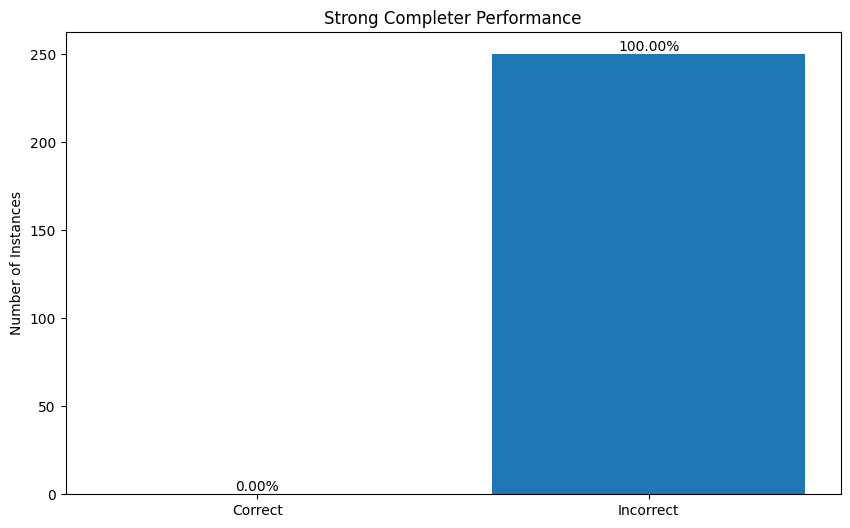

In [7]:
# Calculate the percentage of correct strong completions
strong_correct = df['completion_verified'] == 'True'
percentage_correct = (strong_correct.sum() / len(df)) * 100

# Get the ids of correct instances
correct_ids = df[strong_correct]['index'].tolist()

# Print results
print(f"Percentage of correct strong completions: {percentage_correct:.2f}%")
print(f"Number of correct instances: {len(correct_ids)}")
print("IDs of correct instances:")
print(correct_ids)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(['Correct', 'Incorrect'], [strong_correct.sum(), len(df) - strong_correct.sum()])
plt.title('Strong Completer Performance (Command R+ Latest)')
plt.ylabel('Number of Instances')
plt.text(0, strong_correct.sum(), f'{percentage_correct:.2f}%', ha='center', va='bottom')
plt.text(1, len(df) - strong_correct.sum(), f'{100 - percentage_correct:.2f}%', ha='center', va='bottom')
plt.show()
